In [1]:
from torch.nn import Linear
import torch
from torch_geometric.utils import to_dense_adj, dense_to_sparse

import numpy as np

import pickle
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

import networkx as nx

In [3]:
len(glob('reservoir_data/*.pickle'))

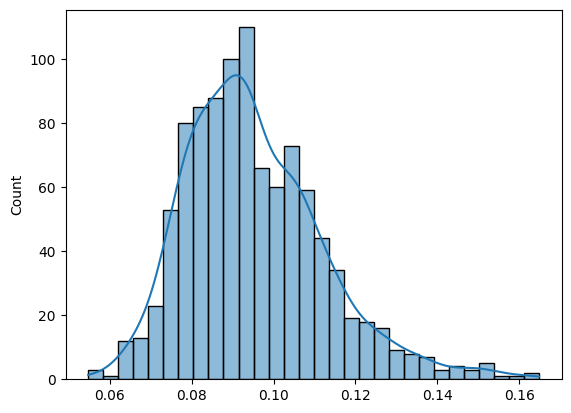

In [136]:
for file_name in glob('reservoir_data/res_23_more_info/*.pickle'):
    with open(file_name, 'rb') as file:
        data = pickle.load(file)
        sns.histplot(data['mean_rmse'], bins=30, kde=True )
        plt.show()
        break

In [137]:
data.keys()

dict_keys(['mean_rmse', 'reservoir', 'w_in', 'sparsity_mask', 'sparsity', 'feature_vectors'])

In [138]:
arr_w_res = data['reservoir'][0].copy()
arr_w_in = data['w_in'][0].copy()

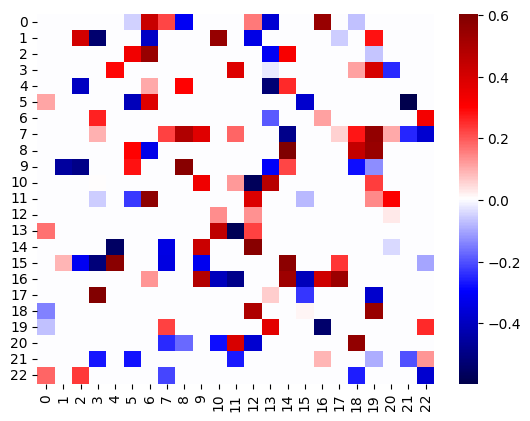

In [139]:
sns.heatmap(arr_w_res,cmap='seismic',annot=False)
plt.show()

In [140]:
n_input_neurons = 2
n_neurons = 25

In [141]:
zeros = np.zeros((n_input_neurons,n_input_neurons))
adj_w_in = np.hstack([zeros, arr_w_in.T])

In [142]:
zeros_w_res = np.zeros((n_neurons-n_input_neurons,n_input_neurons))
adj_w_res = np.hstack([zeros_w_res, arr_w_res.T])

In [143]:
final_adj = np.vstack([adj_w_in,adj_w_res])

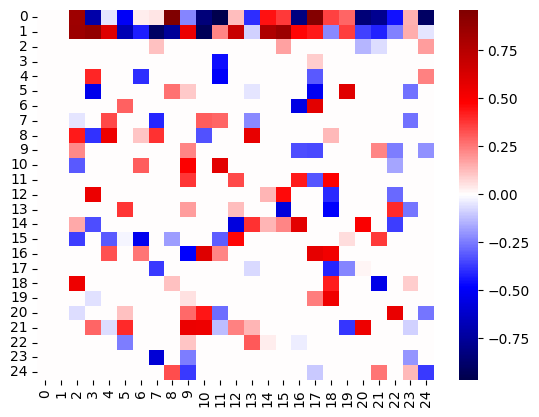

In [144]:
sns.heatmap(final_adj,cmap='seismic',center=0, annot=False)
plt.show()

In [145]:
def get_center(pos):
    return np.mean(np.vstack(list(pos.values())),axis=0)

In [146]:
def get_most_left_x(pos):
    return np.min(np.vstack(list(pos.values()))[:,0])

In [147]:
def get_highest_y(pos):
    return np.max(np.vstack(list(pos.values()))[:,1])

In [148]:
def get_lowest_y(pos):
    return np.min(np.vstack(list(pos.values()))[:,1])

In [149]:
def update_pos(pos):
    x_center, y_center = get_center(pos)
    most_left_x = get_most_left_x(pos)
    x = most_left_x - np.abs(most_left_x - x_center)/2 
    y_1 = y_center + np.abs(get_highest_y(pos) - y_center)/4
    y_2 = y_center - np.abs(get_lowest_y(pos) - y_center)/4

    pos[0][0] = x
    pos[1][0] = x

    pos[0][1] = y_1
    pos[1][1] = y_2

In [150]:
nodes = np.arange(n_neurons)

neuron_layers = {i:int(i > 1) for i in range(n_neurons)}

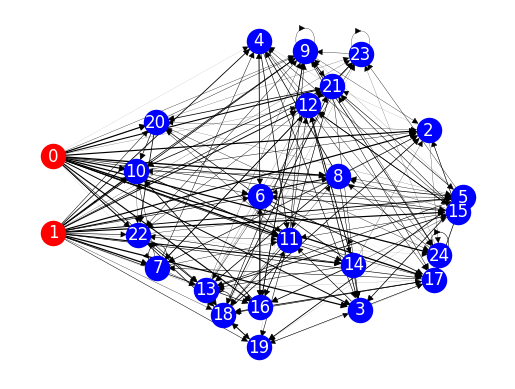

In [151]:
G = nx.from_numpy_array(np.matrix(final_adj), create_using=nx.DiGraph)
for neuron_id in nodes:
    G.add_node(neuron_id, layer = neuron_layers[neuron_id])
    
#pos = nx.multipartite_layout(G, subset_key="layer")
#pos = nx.random_layout(G)
pos = nx.spring_layout(G,k=1)

update_pos(pos)

#pos = nx.nx_agraph.graphviz_layout(G)

#nx.draw_networkx_nodes(G, pos)

#for edge in G.edges(data=True):#(data=['weight','active']):
#    i,j,data = edge
#    nx.draw_networkx_edges(G, 
#                           pos, 
#                           edgelist=[edge], 
#                           width=data['weight'],
#                           )
#    

#plt.figure(1,figsize=(12,12))

nx.draw_networkx_nodes(G, pos, nodelist=[0,1],node_color='red')
nx.draw_networkx_nodes(G, pos, nodelist=list(range(2,n_neurons)),node_color='blue')

for edge in G.edges(data=True):#(data=['weight','active']):
    i,j,data = edge
    nx.draw_networkx_edges(G, 
                           pos, 
                           edgelist=[edge], 
                           width=data['weight'],
                           )
    
nx.draw_networkx_labels(G, pos, font_color='white')
    

#nx.draw(G,pos=pos, with_labels=True)

plt.axis("off")
plt.show()
#plt.savefig('images/Reservoir_Dataset/random_reservoir_30_nodes.png')
#plt.savefig('images/Reservoir_Dataset/random_reservoir_30_nodes.pdf')
#plt.savefig('images/Reservoir_Dataset/random_reservoir_30_nodes.svg')

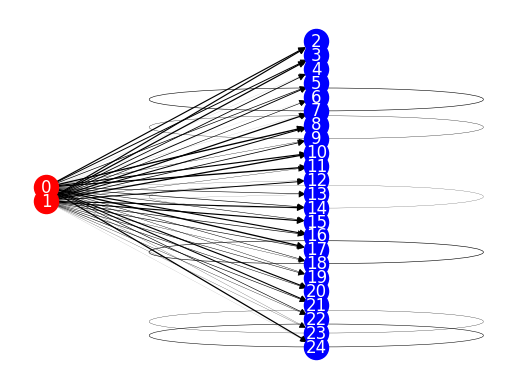

In [152]:
G = nx.from_numpy_array(np.matrix(final_adj), create_using=nx.DiGraph)
for neuron_id in nodes:
    G.add_node(neuron_id, layer = neuron_layers[neuron_id])
    
pos = nx.multipartite_layout(G, subset_key="layer")
#pos = nx.random_layout(G)
#pos = nx.spring_layout(G,k=1)

#update_pos(pos)

#pos = nx.nx_agraph.graphviz_layout(G)

#nx.draw_networkx_nodes(G, pos)

#for edge in G.edges(data=True):#(data=['weight','active']):
#    i,j,data = edge
#    nx.draw_networkx_edges(G, 
#                           pos, 
#                           edgelist=[edge], 
#                           width=data['weight'],
#                           )
#    

nx.draw_networkx_nodes(G, pos, nodelist=[0,1],node_color='red')
nx.draw_networkx_nodes(G, pos, nodelist=list(range(2,n_neurons)),node_color='blue')

for edge in G.edges(data=True):#(data=['weight','active']):
    i,j,data = edge
    nx.draw_networkx_edges(G, 
                           pos, 
                           edgelist=[edge], 
                           width=data['weight'],
                           )
    
nx.draw_networkx_labels(G, pos, font_color='white')
    

#nx.draw(G,pos=pos, with_labels=True)

plt.axis("off")
plt.show()

In [153]:
def update_pos_bipartite(pos):
    scaling_matrix = np.identity(2)*20
    for key in pos:
        pos[key] = np.dot(scaling_matrix, pos[key].T).T

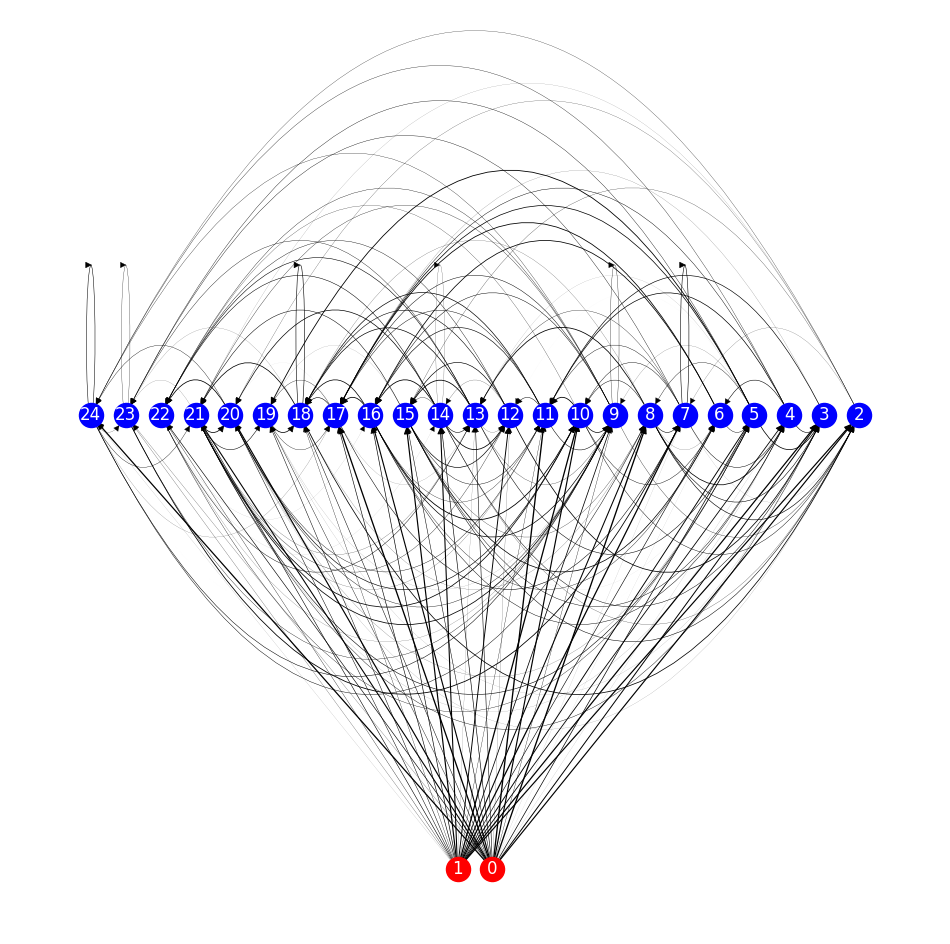

In [154]:
G = nx.from_numpy_array(np.matrix(final_adj), create_using=nx.DiGraph)
for neuron_id in nodes:
    G.add_node(neuron_id, layer = neuron_layers[neuron_id])
    
pos = nx.multipartite_layout(G, subset_key="layer",align='horizontal', scale=5)
#pos = nx.random_layout(G)
#pos = nx.spring_layout(G,k=1)

#update_pos_bipartite(pos)

#pos = nx.nx_agraph.graphviz_layout(G)

#nx.draw_networkx_nodes(G, pos)

#for edge in G.edges(data=True):#(data=['weight','active']):
#    i,j,data = edge
#    nx.draw_networkx_edges(G, 
#                           pos, 
#                           edgelist=[edge], 
#                           width=data['weight'],
#                           )
#    

plt.figure(1,figsize=(12,12))

nx.draw_networkx_nodes(G, pos, nodelist=[0,1],node_color='red')
nx.draw_networkx_nodes(G, pos, nodelist=list(range(2,n_neurons)),node_color='blue')

for edge in G.edges(data=True):#(data=['weight','active']):
    i,j,data = edge
    if i in [0,1]: 
        nx.draw_networkx_edges(G, 
                               pos, 
                               edgelist=[edge], 
                               width=data['weight'],
                               )
    else:
        nx.draw_networkx_edges(G, 
                               pos, 
                               edgelist=[edge], 
                               width=data['weight'],
                               connectionstyle= 'arc3,rad=1'
                               )
    
nx.draw_networkx_labels(G, pos, font_color='white')
    

#nx.draw(G,pos=pos, with_labels=True)

plt.axis("off")
plt.savefig('images/Reservoir_Dataset/layered_reservoir_23_nodes.png')
plt.savefig('images/Reservoir_Dataset/layered_reservoir_23_nodes.pdf')
plt.savefig('images/Reservoir_Dataset/layered_reservoir_23_nodes.svg')

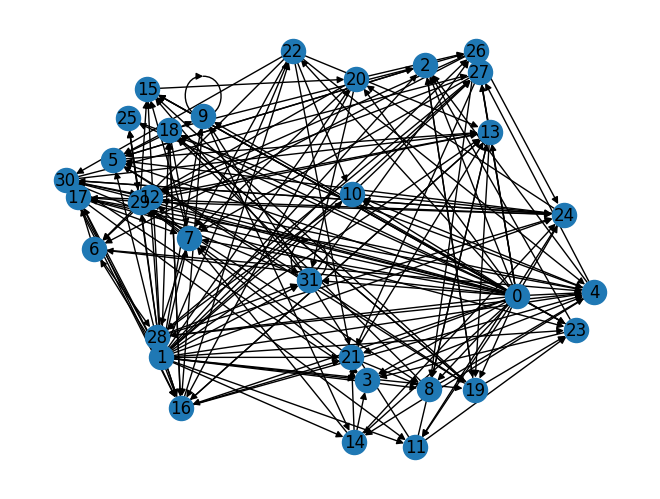

In [224]:
#G = nx.DiGraph()
#nodes = list(range(n_neurons))
#for neuron_id in nodes:
#    G.add_node(neuron_id, layer = neuron_layers[neuron_id])
    
#G.add_edge(gene.out_node, 
#           gene.in_node, 
#           weight = gene.weight,
#           recurrent = self.neuron_layers[gene.out_node] >= self.neuron_layers[gene.in_node],
#           innovation_number = gene.innovation_number)

#pos = nx.multipartite_layout(G, subset_key="layer")
#nx.draw_networkx_nodes(G, pos)
#
## draw edges based on weight 
#for edge in G.edges(data=True):#(data=['weight','active']):
#    i,j,data = edge
#    nx.draw_networkx_edges(G, 
#                           pos, 
#                           edgelist=[edge], 
#                           width=data['weight'],
#                           edge_color='r' if data['recurrent'] else 'b')
#    
#nx.draw_networkx_labels(G, pos, font_color='white')
#
#label_attribute = 'innovation_number' if display_id else 'weight'
#edge_labels = nx.get_edge_attributes(G, label_attribute)
#nx.draw_networkx_edge_labels(G, pos, edge_labels)

nx.draw(G,with_labels=True)

#plt.figure(3,figsize=(12,12)) 
plt.axis("off")
plt.show()

In [ ]:
    def draw_graph(self, display_id=False):
        G = nx.DiGraph()
        #input_nodes = []
        
        # ok lets use bfs to produce layers
        #layers = self._bfs()
        for neuron_id in self.adjacency_list:
            G.add_node(neuron_id, layer = self.neuron_layers[neuron_id])
        
        for key in self.touple_links:
            gene = self.touple_links[key]
            if gene.active:
                G.add_edge(gene.out_node, 
                           gene.in_node, 
                           weight = gene.weight,
                           recurrent = self.neuron_layers[gene.out_node] >= self.neuron_layers[gene.in_node],
                           innovation_number = gene.innovation_number)

        #pos = nx.spring_layout(G, seed=7) 
        
        
        # then you need to know which layer the neuron is which we can update during the add_node  
        pos = nx.multipartite_layout(G, subset_key="layer")

        # select nodes above the treshold
        #elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
        #esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

        # nodes
        nx.draw_networkx_nodes(G, pos)

        # edges
        #nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
        #nx.draw_networkx_edges(G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed" )

        # draw edges based on weight 
        for edge in G.edges(data=True):#(data=['weight','active']):
            i,j,data = edge
            nx.draw_networkx_edges(G, 
                                   pos, 
                                   edgelist=[edge], 
                                   width=data['weight'],
                                   edge_color='r' if data['recurrent'] else 'b')

        # node labels
        #nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
        nx.draw_networkx_labels(G, pos, font_color='white')

        # edge labels
        label_attribute = 'innovation_number' if display_id else 'weight'
        edge_labels = nx.get_edge_attributes(G, label_attribute)
        nx.draw_networkx_edge_labels(G, pos, edge_labels)

        #nx.draw(G,with_labels=True)

        plt.axis("off")
        plt.show()

### VAE 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class VAE(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=400, latent_dim=20):
        super(VAE, self).__init__()
        
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)  # For mean
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)  # For log variance
        
        # Decoder
        self.fc2 = nn.Linear(latent_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, input_dim)
        
    def encode(self, x):
        h = F.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc2(z))
        return torch.sigmoid(self.fc3(h))  # Sigmoid for [0, 1] output

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

In [ ]:
def loss_function(recon_x, x, mu, logvar):
    # Reconstruction loss
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    # KL divergence
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for x, _ in train_loader:
        x = x.view(-1, 784).to(device)  # Flatten the images
        optimizer.zero_grad()
        recon, mu, logvar = model(x)
        loss = loss_function(recon, x, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    
    print(f"Epoch {epoch+1}, Loss: {train_loss / len(train_loader.dataset):.4f}")

In [ ]:
#Reconstruct Inputs
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    for x, _ in test_loader:
        x = x.view(-1, 784).to(device)
        recon, _, _ = model(x)
        break

# Visualize original and reconstructed images
x = x.view(-1, 28, 28).cpu()
recon = recon.view(-1, 28, 28).cpu()

fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    axs[0, i].imshow(x[i], cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(recon[i], cmap='gray')
    axs[1, i].axis('off')
plt.show()

In [250]:
#Generate New Samples
with torch.no_grad():
    z = torch.randn(10, 20).to(device)  # Sample from the latent space
    samples = model.decode(z).view(-1, 28, 28).cpu()

# Visualize generated images
fig, axs = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axs[i].imshow(samples[i], cmap='gray')
    axs[i].axis('off')
plt.show()

NameError: name 'torch' is not defined

In [ ]:
# another one

In [ ]:
import torch
import torch.nn as nn

import numpy as np

from tqdm import tqdm
from torchvision.utils import save_image, make_grid

In [ ]:
# Model Hyperparameters

dataset_path = '~/datasets'

cuda = True
DEVICE = torch.device("cuda" if cuda else "cpu")


batch_size = 100

x_dim  = 784
hidden_dim = 400
latent_dim = 200

lr = 1e-3

epochs = 30

In [ ]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


mnist_transform = transforms.Compose([
        transforms.ToTensor(),
])

kwargs = {'num_workers': 1, 'pin_memory': True} 

train_dataset = MNIST(dataset_path, transform=mnist_transform, train=True, download=True)
test_dataset  = MNIST(dataset_path, transform=mnist_transform, train=False, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=False, **kwargs)

In [ ]:
"""
    A simple implementation of Gaussian MLP Encoder and Decoder
"""

class Encoder(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()

        self.FC_input = nn.Linear(input_dim, hidden_dim)
        self.FC_input2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_mean  = nn.Linear(hidden_dim, latent_dim)
        self.FC_var   = nn.Linear (hidden_dim, latent_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
        self.training = True
        
    def forward(self, x):
        h_       = self.LeakyReLU(self.FC_input(x))
        h_       = self.LeakyReLU(self.FC_input2(h_))
        mean     = self.FC_mean(h_)
        log_var  = self.FC_var(h_)                     # encoder produces mean and log of variance 
                                                       #             (i.e., parateters of simple tractable normal distribution "q"
        
        return mean, log_var

In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.FC_hidden = nn.Linear(latent_dim, hidden_dim)
        self.FC_hidden2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_output = nn.Linear(hidden_dim, output_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def forward(self, x):
        h     = self.LeakyReLU(self.FC_hidden(x))
        h     = self.LeakyReLU(self.FC_hidden2(h))
        
        x_hat = torch.sigmoid(self.FC_output(h))
        return x_hat

In [ ]:
class Model(nn.Module):
    def __init__(self, Encoder, Decoder):
        super(Model, self).__init__()
        self.Encoder = Encoder
        self.Decoder = Decoder
        
    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(DEVICE)        # sampling epsilon        
        z = mean + var*epsilon                          # reparameterization trick
        return z
        
                
    def forward(self, x):
        mean, log_var = self.Encoder(x)
        z = self.reparameterization(mean, torch.exp(0.5 * log_var)) # takes exponential function (log var -> var)
        x_hat            = self.Decoder(z)
        
        return x_hat, mean, log_var

In [ ]:
encoder = Encoder(input_dim=x_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, output_dim = x_dim)

model = Model(Encoder=encoder, Decoder=decoder).to(DEVICE)

In [ ]:
from torch.optim import Adam

BCE_loss = nn.BCELoss()

def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD      = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD


optimizer = Adam(model.parameters(), lr=lr)

In [ ]:
print("Start training VAE...")
model.train()

for epoch in range(epochs):
    overall_loss = 0
    for batch_idx, (x, _) in enumerate(train_loader):
        x = x.view(batch_size, x_dim)
        x = x.to(DEVICE)

        optimizer.zero_grad()

        x_hat, mean, log_var = model(x)
        loss = loss_function(x, x_hat, mean, log_var)
        
        overall_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
    print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))
    
print("Finish!!")

In [ ]:
model.eval()

with torch.no_grad():
    for batch_idx, (x, _) in enumerate(tqdm(test_loader)):
        x = x.view(batch_size, x_dim)
        x = x.to(DEVICE)
        
        x_hat, _, _ = model(x)


        break

In [ ]:
class VAE(nn.Module):

    def __init__(self, input_dim=784, hidden_dim=400, latent_dim=200, device=device):
        super(VAE, self).__init__()

        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, latent_dim),
            nn.LeakyReLU(0.2)
            )
        
        # latent mean and variance 
        self.mean_layer = nn.Linear(latent_dim, 2)
        self.logvar_layer = nn.Linear(latent_dim, 2)
        
        # decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, latent_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(latent_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
            )
     
    def encode(self, x):
        x = self.encoder(x)
        mean, logvar = self.mean_layer(x), self.logvar_layer(x)
        return mean, logvar

    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(device)      
        z = mean + var*epsilon
        return z

    def decode(self, x):
        return self.decoder(x)

    def forward(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterization(mean, logvar)
        x_hat = self.decode(z)
        return x_hat, mean, log_var


In [ ]:
model = VAE().to(device)
optimizer = Adam(model.parameters(), lr=1e-3)

In [ ]:
def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD

In [ ]:
def train(model, optimizer, epochs, device):
    model.train()
    for epoch in range(epochs):
        overall_loss = 0
        for batch_idx, (x, _) in enumerate(train_loader):
            x = x.view(batch_size, x_dim).to(device)

            optimizer.zero_grad()

            x_hat, mean, log_var = model(x)
            loss = loss_function(x, x_hat, mean, log_var)
            
            overall_loss += loss.item()
            
            loss.backward()
            optimizer.step()

        print("\tEpoch", epoch + 1, "\tAverage Loss: ", overall_loss/(batch_idx*batch_size))
    return overall_loss

train(model, optimizer, epochs=50, device=device)

In [ ]:
def generate_digit(mean, var):
    z_sample = torch.tensor([[mean, var]], dtype=torch.float).to(device)
    x_decoded = model.decode(z_sample)
    digit = x_decoded.detach().cpu().reshape(28, 28) # reshape vector to 2d array
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

generate_digit(0.0, 1.0), generate_digit(1.0, 0.0)

In [ ]:
# another one

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class VAE(nn.Module):
    """
    Variational Autoencoder (VAE) class.
    
    Args:
        input_dim (int): Dimensionality of the input data.
        hidden_dim (int): Dimensionality of the hidden layer.
        latent_dim (int): Dimensionality of the latent space.
    """
    
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
                
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.SiLU(),  # Swish activation function
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.SiLU(),  # Swish activation function
            nn.Linear(hidden_dim // 2, hidden_dim // 4),
            nn.SiLU(),  # Swish activation function
            nn.Linear(hidden_dim // 4, hidden_dim // 8),
            nn.SiLU(),  # Swish activation function
            nn.Linear(hidden_dim // 8, 2 * latent_dim), # 2 for mean and variance.
        )
        self.softplus = nn.Softplus()
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim // 8),
            nn.SiLU(),  # Swish activation function
            nn.Linear(hidden_dim // 8, hidden_dim // 4),
            nn.SiLU(),  # Swish activation function
            nn.Linear(hidden_dim // 4, hidden_dim // 2),
            nn.SiLU(),  # Swish activation function
            nn.Linear(hidden_dim // 2, hidden_dim),
            nn.SiLU(),  # Swish activation function
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid(),
        )
        
    def encode(self, x, eps: float = 1e-8):
        """
        Encodes the input data into the latent space.
        
        Args:
            x (torch.Tensor): Input data.
            eps (float): Small value to avoid numerical instability.
        
        Returns:
            torch.distributions.MultivariateNormal: Normal distribution of the encoded data.
        """
        x = self.encoder(x)
        mu, logvar = torch.chunk(x, 2, dim=-1)
        scale = self.softplus(logvar) + eps
        scale_tril = torch.diag_embed(scale)
        
        return torch.distributions.MultivariateNormal(mu, scale_tril=scale_tril)
        
    def reparameterize(self, dist):
        """
        Reparameterizes the encoded data to sample from the latent space.
        
        Args:
            dist (torch.distributions.MultivariateNormal): Normal distribution of the encoded data.
        Returns:
            torch.Tensor: Sampled data from the latent space.
        """
        return dist.rsample()
    
    def decode(self, z):
        """
        Decodes the data from the latent space to the original input space.
        
        Args:
            z (torch.Tensor): Data in the latent space.
        
        Returns:
            torch.Tensor: Reconstructed data in the original input space.
        """
        return self.decoder(z)
    
    def forward(self, x, compute_loss: bool = True):
        """
        Performs a forward pass of the VAE.
        
        Args:
            x (torch.Tensor): Input data.
            compute_loss (bool): Whether to compute the loss or not.
        
        Returns:
            VAEOutput: VAE output dataclass.
        """
        dist = self.encode(x)
        z = self.reparameterize(dist)
        recon_x = self.decode(z)
        
        if not compute_loss:
            return VAEOutput(
                z_dist=dist,
                z_sample=z,
                x_recon=recon_x,
                loss=None,
                loss_recon=None,
                loss_kl=None,
            )
        
        # compute loss terms 
        loss_recon = F.binary_cross_entropy(recon_x, x + 0.5, reduction='none').sum(-1).mean()
        std_normal = torch.distributions.MultivariateNormal(
            torch.zeros_like(z, device=z.device),
            scale_tril=torch.eye(z.shape[-1], device=z.device).unsqueeze(0).expand(z.shape[0], -1, -1),
        )
        loss_kl = torch.distributions.kl.kl_divergence(dist, std_normal).mean()
                
        loss = loss_recon + loss_kl
        
        return VAEOutput(
            z_dist=dist,
            z_sample=z,
            x_recon=recon_x,
            loss=loss,
            loss_recon=loss_recon,
            loss_kl=loss_kl,
        )

In [ ]:
from datetime import datetime

import torch
from torch.utils.tensorboard import SummaryWriter

learning_rate = 1e-3
weight_decay = 1e-2
num_epochs = 50
latent_dim = 2
hidden_dim = 512

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VAE(input_dim=784, hidden_dim=hidden_dim, latent_dim=latent_dim).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
writer = SummaryWriter(f'runs/mnist/vae_{datetime.now().strftime("%Y%m%d-%H%M%S")}')

In [ ]:
def train(model, dataloader, optimizer, prev_updates, writer=None):
    """
    Trains the model on the given data.
    
    Args:
        model (nn.Module): The model to train.
        dataloader (torch.utils.data.DataLoader): The data loader.
        loss_fn: The loss function.
        optimizer: The optimizer.
    """
    model.train()  # Set the model to training mode
    
    for batch_idx, (data, target) in enumerate(tqdm(dataloader)):
        n_upd = prev_updates + batch_idx
        
        data = data.to(device)
        
        optimizer.zero_grad()  # Zero the gradients
        
        output = model(data)  # Forward pass
        loss = output.loss
        
        loss.backward()
        
        if n_upd % 100 == 0:
            # Calculate and log gradient norms
            total_norm = 0.0
            for p in model.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
            total_norm = total_norm ** (1. / 2)
        
            print(f'Step {n_upd:,} (N samples: {n_upd*batch_size:,}), Loss: {loss.item():.4f} (Recon: {output.loss_recon.item():.4f}, KL: {output.loss_kl.item():.4f}) Grad: {total_norm:.4f}')

            if writer is not None:
                global_step = n_upd
                writer.add_scalar('Loss/Train', loss.item(), global_step)
                writer.add_scalar('Loss/Train/BCE', output.loss_recon.item(), global_step)
                writer.add_scalar('Loss/Train/KLD', output.loss_kl.item(), global_step)
                writer.add_scalar('GradNorm/Train', total_norm, global_step)
            
        # gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)    
        
        optimizer.step()  # Update the model parameters
        
    return prev_updates + len(dataloader)

In [ ]:
import torch
import matplotlib.pyplot as plt


n = 15
z1 = torch.linspace(-0, 1, n)
z2 = torch.zeros_like(z1) + 2
z = torch.stack([z1, z2], dim=-1).to(device)
samples = model.decode(z)
samples = torch.sigmoid(samples)

# Plot the generated images
fig, ax = plt.subplots(1, n, figsize=(n, 1))
for i in range(n):
    ax[i].imshow(samples[i].view(28, 28).cpu().detach().numpy(), cmap='gray')
    ax[i].axis('off')
    
plt.savefig('vae_mnist_interp.webp')

### CNN VAE 

In [ ]:
def vae_gaussian_kl_loss(mu, logvar):
    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1)
    return KLD.mean()
def reconstruction_loss(x_reconstructed, x):
    bce_loss = nn.BCELoss()
    return bce_loss(x_reconstructed, x)
def vae_loss(y_pred, y_true):
    mu, logvar, recon_x = y_pred
    recon_loss = reconstruction_loss(recon_x, y_true)
    kld_loss = vae_gaussian_kl_loss(mu, logvar)
    return 500 * recon_loss + kld_loss

In [ ]:
# define a class for sampling
# this class will be used in the encoder for sampling in the latent space
class Sampling(nn.Module):
    def forward(self, z_mean, z_log_var):
        # get the shape of the tensor for the mean and log variance
        batch, dim = z_mean.shape
        # generate a normal random tensor (epsilon) with the same shape as z_mean
        # this tensor will be used for reparameterization trick
        epsilon = Normal(0, 1).sample((batch, dim)).to(z_mean.device)
        # apply the reparameterization trick to generate the samples in the
        # latent space
        return z_mean + torch.exp(0.5 * z_log_var) * epsilon

In [ ]:
class VAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        # initialize the encoder and decoder
        self.encoder = encoder
        self.decoder = decoder
    def forward(self, x):
        # pass the input through the encoder to get the latent vector
        z_mean, z_log_var, z = self.encoder(x)
        # pass the latent vector through the decoder to get the reconstructed
        # image
        reconstruction = self.decoder(z)
        # return the mean, log variance and the reconstructed image
        return z_mean, z_log_var, reconstruction

In [ ]:
# instantiate the encoder and decoder models
encoder = network.Encoder(config.IMAGE_SIZE, config.EMBEDDING_DIM).to(
    config.DEVICE
)
decoder = network.Decoder(
    config.EMBEDDING_DIM, config.SHAPE_BEFORE_FLATTENING
).to(config.DEVICE)
# pass the encoder and decoder to VAE class
vae = network.VAE(encoder, decoder)

In [ ]:
# instantiate optimizer and scheduler
optimizer = optim.Adam(
    list(encoder.parameters()) + list(decoder.parameters()), lr=config.LR
)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.1, patience=config.PATIENCE, verbose=True
)

In [ ]:
# initialize the best validation loss as infinity
best_val_loss = float("inf")
# start training by looping over the number of epochs
for epoch in range(config.EPOCHS):
    # set the vae model to train mode
    # and move it to CPU/GPU
    vae.train()
    vae.to(config.DEVICE)
    running_loss = 0.0
    # loop over the batches of the training dataset
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(config.DEVICE)
        optimizer.zero_grad()
        # forward pass through the VAE
        pred = vae(data)
        # compute the VAE loss
        loss = utils.vae_loss(pred, data)
        # backward pass and optimizer step
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    # compute average loss for the epoch
    train_loss = running_loss / len(train_loader)
    # compute validation loss for the epoch
    val_loss = utils.validate(vae, test_loader)
    # print training and validation loss at every 20 epochs
    if epoch % 20 == 0 or (epoch+1) == config.EPOCHS:
        print(
            f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}"
        )
    # save best vae model weights based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(
            {"vae": vae.state_dict()},
            config.MODEL_WEIGHTS_PATH,
        )
    # adjust learning rate based on the validation loss
    scheduler.step(val_loss)

In [ ]:
# and anoutherone

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class VAE(nn.Module):
    def __init__(self, imgChannels=1, featureDim=32*20*20, zDim=256):
        super(VAE, self).__init__()

        # Initializing the 2 convolutional layers and 2 full-connected layers for the encoder
        self.encConv1 = nn.Conv2d(imgChannels, 16, 5)
        self.encConv2 = nn.Conv2d(16, 32, 5)
        self.encFC1 = nn.Linear(featureDim, zDim)
        self.encFC2 = nn.Linear(featureDim, zDim)

        # Initializing the fully-connected layer and 2 convolutional layers for decoder
        self.decFC1 = nn.Linear(zDim, featureDim)
        self.decConv1 = nn.ConvTranspose2d(32, 16, 5)
        self.decConv2 = nn.ConvTranspose2d(16, imgChannels, 5)

    def encoder(self, x):

        # Input is fed into 2 convolutional layers sequentially
        # The output feature map are fed into 2 fully-connected layers to predict mean (mu) and variance (logVar)
        # Mu and logVar are used for generating middle representation z and KL divergence loss
        x = F.relu(self.encConv1(x))
        x = F.relu(self.encConv2(x))
        x = x.view(-1, 32*20*20)
        mu = self.encFC1(x)
        logVar = self.encFC2(x)
        return mu, logVar

    def reparameterize(self, mu, logVar):

        #Reparameterization takes in the input mu and logVar and sample the mu + std * eps
        std = torch.exp(logVar/2)
        eps = torch.randn_like(std)
        return mu + std * eps

    def decoder(self, z):

        # z is fed back into a fully-connected layers and then into two transpose convolutional layers
        # The generated output is the same size of the original input
        x = F.relu(self.decFC1(z))
        x = x.view(-1, 32, 20, 20)
        x = F.relu(self.decConv1(x))
        x = torch.sigmoid(self.decConv2(x))
        return x

    def forward(self, x):

        # The entire pipeline of the VAE: encoder -> reparameterization -> decoder
        # output, mu, and logVar are returned for loss computation
        mu, logVar = self.encoder(x)
        z = self.reparameterize(mu, logVar)
        out = self.decoder(z)
        return out, mu, logVar

In [ ]:
"""
Initialize Hyperparameters
"""
batch_size = 128
learning_rate = 1e-3
num_epochs = 10


"""
Create dataloaders to feed data into the neural network
Default MNIST dataset is used and standard train/test split is performed
"""
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                    transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=1)


"""
Initialize the network and the Adam optimizer
"""
net = VAE().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


"""
Training the network for a given number of epochs
The loss after every epoch is printed
"""
for epoch in range(num_epochs):
    for idx, data in enumerate(train_loader, 0):
        imgs, _ = data
        imgs = imgs.to(device)

        # Feeding a batch of images into the network to obtain the output image, mu, and logVar
        out, mu, logVar = net(imgs)

        # The loss is the BCE loss combined with the KL divergence to ensure the distribution is learnt
        kl_divergence = 0.5 * torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
        loss = F.binary_cross_entropy(out, imgs, size_average=False) + kl_divergence

        # Backpropagation based on the loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch {}: Loss {}'.format(epoch, loss))

In [ ]:

"""
The following part takes a random image from test loader to feed into the VAE.
Both the original image and generated image from the distribution are shown.
"""

import matplotlib.pyplot as plt
import numpy as np
import random

net.eval()
with torch.no_grad():
    for data in random.sample(list(test_loader), 1):
        imgs, _ = data
        imgs = imgs.to(device)
        img = np.transpose(imgs[0].cpu().numpy(), [1,2,0])
        plt.subplot(121)
        plt.imshow(np.squeeze(img))
        out, mu, logVAR = net(imgs)
        outimg = np.transpose(out[0].cpu().numpy(), [1,2,0])
        plt.subplot(122)
        plt.imshow(np.squeeze(outimg))
        break

### VGAE GCN

### VGAE 

### MINE

In [252]:
def create_weighted_adj_matrix(w_res, w_in):
    
    n_neurons = 32
    n_input_neurons = 2
    
    zeros = np.zeros((n_input_neurons,n_input_neurons))
    adj_w_in = np.hstack([zeros, arr_w_in.T])
    
    zeros_w_res = np.zeros((n_neurons-n_input_neurons,n_input_neurons))
    adj_w_res = np.hstack([zeros_w_res, arr_w_res.T])
    
    final_adj = np.vstack([adj_w_in,adj_w_res])
    
    return final_adj
    

In [6]:
len(edge_index[0])

6

In [12]:
import torch
from torch_geometric.utils.convert import from_scipy_sparse_matrix,to_scipy_sparse_matrix
from torch_geometric.utils import to_dense_adj, dense_to_sparse

edge_index = torch.tensor([
   [0, 1, 1, 2, 2, 3],
   [1, 0, 2, 1, 3, 2],
])

edge_attr = torch.tensor([0.1,0.2,0.3, 0.4,0.5,0.6])

adj = to_scipy_sparse_matrix(edge_index,edge_attr)
# `edge_index` and `edge_weight` are both returned
print(adj)

#from_scipy_sparse_matrix(adj)

dense = to_dense_adj(edge_index=edge_index,edge_attr =edge_attr)

print(dense)

sparse_tensor = dense_to_sparse(dense)

print(sparse_tensor)



<COOrdinate sparse matrix of dtype 'float32'
	with 6 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	0.10000000149011612
  (1, 0)	0.20000000298023224
  (1, 2)	0.30000001192092896
  (2, 1)	0.4000000059604645
  (2, 3)	0.5
  (3, 2)	0.6000000238418579
tensor([[[0.0000, 0.1000, 0.0000, 0.0000],
         [0.2000, 0.0000, 0.3000, 0.0000],
         [0.0000, 0.4000, 0.0000, 0.5000],
         [0.0000, 0.0000, 0.6000, 0.0000]]])
(tensor([[0, 1, 1, 2, 2, 3],
        [1, 0, 2, 1, 3, 2]]), tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000]))


In [23]:
import sys

### This dataset is depracated since the dataset with threshold can do the same thing

In [ ]:
class Graph_as_image_dataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self,file_ln):
        # get the paths
        self.paths = glob('reservoir_data/*.pickle')
        self.file_ln = file_ln

    def __len__(self):
        # n_pickles * num_datapoints
        return len(paths)*self.file_ln

    def __getitem__(self, idx):
        
        # file idx can be calculated as idx/1000
        file_idx = idx//file_ln
        file_path = self.paths[file_idx]
        
        relative_idx = idx - (file_idx * self.file_ln)
        
        with open(file_path, 'rb') as f:
            file_data = pickle.load(f)
            
        arr_w_res = file_data['reservoir'][realtive_idx]
        arr_w_in = file_data['w_in'][realtive_idx]
        
        weighted_adj_matrix = torch.tensor(create_weighted_adj_matrix(arr_w_res, arr_w_in))
        
        return weighted_adj_matrix, weighted_adj_matrix
        

In [ ]:
class Graph_as_image_with_threshold_dataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, threshold):
        # get the paths
        self.paths = glob('reservoir_data/*.pickle')
        # select only the files that have better 
        
        self.pointers = []
        for file_path in self.paths:
            with open(file_path, 'rb') as f:
                file_data = pickle.load(f)
            indeces = np.where(np.array(file_data['mean_rmse']) < threshold)[0]
            
            self.pointers += list(zip([file_path] * len(indeces), indeces))
        
        self.ln = len(self.pointers)

    def __len__(self):
        # n_pickles * num_datapoints
        return self.ln

    def __getitem__(self, idx):
        
        # file idx can be calculated as idx/1000
        
        file_path = self.pointers[idx][0]
        
        relative_idx = self.pointers[idx][1]
        
        with open(file_path, 'rb') as f:
            file_data = pickle.load(f)
            
        arr_w_res = file_data['reservoir'][realtive_idx]
        arr_w_in = file_data['w_in'][realtive_idx]
        
        weighted_adj_matrix = torch.tensor(create_weighted_adj_matrix(arr_w_res, arr_w_in))
        
        return weighted_adj_matrix, weighted_adj_matrix
        

### TODO

In [ ]:
class Dataset_for_dir_gnn(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, threshold):
        # get the paths
        self.paths = glob('reservoir_data/*.pickle')
        # select only the files that have better 
        
        self.pointers = []
        for file_path in self.paths:
            with open(file_path, 'rb') as f:
                file_data = pickle.load(f)
            indeces = np.where(np.array(file_data['mean_rmse']) < threshold)[0]
            
            self.pointers += list(zip([file_path] * len(indeces), indeces))
        
        self.ln = len(self.pointers)

    def __len__(self):
        # n_pickles * num_datapoints
        return self.ln

    def __getitem__(self, idx):
        
        # file idx can be calculated as idx/1000
        
        file_path = self.pointers[idx][0]
        
        relative_idx = self.pointers[idx][1]
        
        with open(file_path, 'rb') as f:
            file_data = pickle.load(f)
            
        # 
        arr_w_res = file_data['reservoir'][realtive_idx]
        arr_w_in = file_data['w_in'][realtive_idx]
        
        weighted_adj_matrix = torch.tensor(create_weighted_adj_matrix(arr_w_res, arr_w_in))
        
        return weighted_adj_matrix, weighted_adj_matrix
        

In [ ]:
class Dataset_for_gcn(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, threshold):
        # get the paths
        self.paths = glob('reservoir_data/*.pickle')
        # select only the files that have better 
        
        self.pointers = []
        for file_path in self.paths:
            with open(file_path, 'rb') as f:
                file_data = pickle.load(f)
            indeces = np.where(np.array(file_data['mean_rmse']) < threshold)[0]
            
            self.pointers += list(zip([file_path] * len(indeces), indeces))
        
        self.ln = len(self.pointers)

    def __len__(self):
        # n_pickles * num_datapoints
        return self.ln

    def __getitem__(self, idx):
        
        # file idx can be calculated as idx/1000
        
        file_path = self.pointers[idx][0]
        
        relative_idx = self.pointers[idx][1]
        
        with open(file_path, 'rb') as f:
            file_data = pickle.load(f)
            
        # 
        arr_w_res = file_data['reservoir'][realtive_idx]
        arr_w_in = file_data['w_in'][realtive_idx]
        
        weighted_adj_matrix = torch.tensor(create_weighted_adj_matrix(arr_w_res, arr_w_in))
        
        return weighted_adj_matrix, weighted_adj_matrix
        

## Directed Graph Convolution

In [ ]:
# TODO: SparseTensor, sparsesum a matmul

In [3]:
def SparseTensor(edge_index, edge_weights):
    return torch.sparse_coo_tensor(edge_index, edge_weights)

In [4]:
def sparsesum(adj, dim):
    return torch.sparse.sum(adj,dim=dim).to_dense()

In [58]:
def directed_norm(adj):
    """
    Applies the normalization for directed graphs:
        \mathbf{D}_{out}^{-1/2} \mathbf{A} \mathbf{D}_{in}^{-1/2}.
    """
    in_deg = sparsesum(adj, dim=0)
    in_deg_inv_sqrt = in_deg.pow_(-0.5)
    in_deg_inv_sqrt.masked_fill_(in_deg_inv_sqrt == float("inf"), 0.0)
     
    out_deg = sparsesum(adj, dim=1)
    out_deg_inv_sqrt = out_deg.pow_(-0.5)
    out_deg_inv_sqrt.masked_fill_(out_deg_inv_sqrt == float("inf"), 0.0)

    adj = adj * out_deg_inv_sqrt.view(-1, 1)
    adj = adj * in_deg_inv_sqrt.view(1, -1)
    return adj

In [59]:
class DirGCN(torch.nn.Module):
    def __init__(self, input_dim, output_dim, alpha):
        super(DirGCN, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim

        self.lin_src_to_dst = Linear(input_dim, output_dim)
        self.lin_dst_to_src = Linear(input_dim, output_dim)
        self.alpha = alpha
        self.adj_norm, self.adj_t_norm = None, None

    def forward(self, x, edge_index, edge_weight=None):
        if self.adj_norm is None:
            row, col = edge_index
            num_nodes = x.shape[0]
            
            edge_weight = edge_weight if edge_weight else torch.ones(edge_index.shape[1])
            
            adj = SparseTensor(edge_index, edge_weight)

            self.adj_norm = directed_norm(adj)
            
            adj_t = SparseTensor(edge_index[[1,0]], edge_weight)
            
            self.adj_t_norm = directed_norm(adj_t)

        return self.alpha * self.lin_src_to_dst(self.adj_norm @ x) + (1 - self.alpha) * self.lin_dst_to_src(
            self.adj_t_norm @ x
        )

In [64]:
flag = 0
smtin = 5 if flag else 6

In [65]:
smtin

6

In [60]:
dir_gcn = DirGCN(4,4,0.5)

In [61]:
edge_index = torch.tensor([
   [0, 1, 1, 2, 2, 3, 1],
   [1, 0, 2, 1, 3, 2, 3],
])

edge_attr = torch.tensor([0.1,0.2,0.3, 0.4,0.5,0.6,0.8])

In [63]:
dir_gcn.forward(torch.eye(4), edge_index)

tensor([[-0.0045, -0.1075, -0.0940, -0.1059],
        [-0.0186,  0.1041,  0.0215, -0.2979],
        [-0.0824, -0.1027, -0.1088, -0.1392],
        [-0.2138,  0.0914, -0.1082, -0.1727]], grad_fn=<AddBackward0>)

In [55]:
print(adn @ torch.eye(4))
print()
print(adtn @ torch.eye(4))

tensor([[0.0000, 0.7071, 0.0000, 0.0000],
        [0.5774, 0.0000, 0.4082, 0.4082],
        [0.0000, 0.5000, 0.0000, 0.5000],
        [0.0000, 0.0000, 0.7071, 0.0000]])

tensor([[0.0000, 0.5774, 0.0000, 0.0000],
        [0.7071, 0.0000, 0.5000, 0.0000],
        [0.0000, 0.4082, 0.0000, 0.7071],
        [0.0000, 0.4082, 0.5000, 0.0000]])


In [ ]:
import torch


In [ ]:
class Dir_Encoder(nn.Module):
    def __init__(self):
        super(Dir_Encoder, self, activation_function=F.relu, alpha=0.5, learn_alpha=False).__init__()
        
        self.alpha = nn.Parameter(torch.ones(1) * alpha, requires_grad=learn_alpha)
        
        self.first_layer =  DirGCN(32,16,alpha)
        # self.second_layer = DirGCN(16,16,alpha)
        self.mu_layer = DirGCN(16,8,alpha)
        self.logvar_layer = DirGCN(16,8,alpha)
        self.activation_function = activation_function
        
    def forward(self, x, edge_index):
        x = self.activation_function(self.first_layer(x, edge_index))
        #x = self.activation_function(self.second_layer(x, edge_index))
        mu = self.mu_layer(x, edge_index)
        logvar = self.logvar_layer(x, edge_index)
        return mu, logvar

In [ ]:
class Dir_Decoder(nn.Module):
    def __init__(self):
        super(Dir_decoder, self).__init__()
        
    def forward(self, Z):
        return torch.matmul(Z,Z.t())

## Graph Convolution

### TODO: weighted edges as well

In [ ]:
class GCN_Encoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN_Encoder, self).__init__()
        self.gcn_shared = GCNConv(in_channels, hidden_channels)
        self.gcn_mu = GCNConv(hidden_channels, out_channels)
        self.gcn_logvar = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = F.relu(self.gcn_shared(x, edge_index))
        mu = self.gcn_mu(x, edge_index)
        logvar = self.gcn_logvar(x, edge_index)
        return mu, logvar

In [ ]:
class GCN_Decoder(nn.Module):
    def __init__(self):
        super(Dir_decoder, self).__init__()
        
    def forward(self, Z):
        return torch.matmul(Z,Z.t())

## FeedForward

In [ ]:
class FF_Encoder(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(FF_Encoder, self).__init__()

        self.FC_input = nn.Linear(input_dim, hidden_dim)
        self.FC_input2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_mean  = nn.Linear(hidden_dim, latent_dim)
        self.FC_var   = nn.Linear (hidden_dim, latent_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
        self.training = True
        
    def forward(self, x):
        h_       = self.LeakyReLU(self.FC_input(x))
        h_       = self.LeakyReLU(self.FC_input2(h_))
        mean     = self.FC_mean(h_)
        log_var  = self.FC_var(h_)                     # encoder produces mean and log of variance 
                                                       #             (i.e., parateters of simple tractable normal distribution "q"
        
        return mean, log_var

In [ ]:
class FF_Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(FF_Decoder, self).__init__()
        self.FC_hidden = nn.Linear(latent_dim, hidden_dim)
        self.FC_hidden2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_output = nn.Linear(hidden_dim, output_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def forward(self, x):
        h     = self.LeakyReLU(self.FC_hidden(x))
        h     = self.LeakyReLU(self.FC_hidden2(h))
        return self.FC_output(h)

## Convlutional NN

In [ ]:
class CNN_Encoder(nn.Module):
    
    #def __init__(self, imgChannels=1, featureDim=32*20*20, zDim=256):
    def __init__(self, feature_dim, z_dim, img_channels = 1):
        super(CNN_Encoder, self).__init__()
        
        self.feature_dim = feature_dim
        
        self.conv1 = nn.Conv2d(img_channels, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.mu_layer = nn.Linear(feature_dim, z_dim)
        self.logvar_layer = nn.Linear(feature_dim, z_dim)
        
    def forward(self, x):
        # Input is fed into 2 convolutional layers sequentially
        # The output feature map are fed into 2 fully-connected layers to predict mean (mu) and variance (logVar)
        # Mu and logVar are used for generating middle representation z and KL divergence loss
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, self.feature_dim)
        mu = self.mu_layer(x)
        logVar = self.logvar_layer(x)
        return mu, logVar

In [ ]:
class CNN_Decoder(nn.Module):
    #def __init__(self, imgChannels=1, featureDim=32*20*20, zDim=256):
    def __init__(self, feature_dim, z_dim, img_channels = 1):
        super(CNN_Decoder, self).__init__()
        
        self.feature_dim = feature_dim
        
        # Initializing the fully-connected layer and 2 convolutional layers for decoder
        self.latent_layer = nn.Linear(z_dim, feature_dim)
        self.deconv1 = nn.ConvTranspose2d(32, 16, 5)
        self.deconv2 = nn.ConvTranspose2d(16, img_channels, 5)
        
    def forward(self, x):
        # Input is fed into 2 convolutional layers sequentially
        # The output feature map are fed into 2 fully-connected layers to predict mean (mu) and variance (logVar)
        # Mu and logVar are used for generating middle representation z and KL divergence loss

        # z is fed back into a fully-connected layers and then into two transpose convolutional layers
        # The generated output is the same size of the original input
        x = F.relu(self.latent_layer(z))
        # TODO
        x = x.view(-1, 32, 20, 20)
        x = F.relu(self.deconv1(x))
        x = torch.sigmoid(self.deconv2(x))
        return x

In [ ]:
# define the encoder
class CNN2_Encoder(nn.Module):
    def __init__(self, image_size, embedding_dim):
        super(CNN2_Encoder, self).__init__()
        # define the convolutional layers for downsampling and feature
        # extraction
        self.conv1 = nn.Conv2d(1, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        # define a flatten layer to flatten the tensor before feeding it into
        # the fully connected layer
        self.flatten = nn.Flatten()
        # define fully connected layers to transform the tensor into the desired
        # embedding dimensions
        self.fc_mean = nn.Linear(
            128 * (image_size // 8) * (image_size // 8), embedding_dim
        )
        self.fc_log_var = nn.Linear(
            128 * (image_size // 8) * (image_size // 8), embedding_dim
        )
        # initialize the sampling layer
        self.sampling = Sampling()
    def forward(self, x):
        # apply convolutional layers with relu activation function
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        # flatten the tensor
        x = self.flatten(x)
        # get the mean and log variance of the latent space distribution
        z_mean = self.fc_mean(x)
        z_log_var = self.fc_log_var(x)
        # sample a latent vector using the reparameterization trick
        z = self.sampling(z_mean, z_log_var)
        return z_mean, z_log_var, z


In [ ]:
# define the decoder
class CNN2_Decoder(nn.Module):
    def __init__(self, embedding_dim, shape_before_flattening):
        super(CNN2_Decoder, self).__init__()
        # define a fully connected layer to transform the latent vector back to
        # the shape before flattening
        self.fc = nn.Linear(
            embedding_dim,
            shape_before_flattening[0]
            * shape_before_flattening[1]
            * shape_before_flattening[2],
        )
        # define a reshape function to reshape the tensor back to its original
        # shape
        self.reshape = lambda x: x.view(-1, *shape_before_flattening)
        # define the transposed convolutional layers for the decoder to upsample
        # and generate the reconstructed image
        self.deconv1 = nn.ConvTranspose2d(
            128, 64, 3, stride=2, padding=1, output_padding=1
        )
        self.deconv2 = nn.ConvTranspose2d(
            64, 32, 3, stride=2, padding=1, output_padding=1
        )
        self.deconv3 = nn.ConvTranspose2d(
            32, 1, 3, stride=2, padding=1, output_padding=1
        )
    def forward(self, x):
        # pass the latent vector through the fully connected layer
        x = self.fc(x)
        # reshape the tensor
        x = self.reshape(x)
        # apply transposed convolutional layers with relu activation function
        x = F.relu(self.deconv1(x))
        x = F.relu(self.deconv2(x))
        # apply the final transposed convolutional layer with a sigmoid
        # activation to generate the final output
        x = torch.sigmoid(self.deconv3(x))
        return x

### Universal VAE Model

In [ ]:
class Model(nn.Module):
    def __init__(self, Encoder, Decoder, device):
        super(Model, self).__init__()
        self.Encoder = Encoder
        self.Decoder = Decoder
        self.device = device
        
    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(self.device)        # sampling epsilon        
        z = mean + var*epsilon                          # reparameterization trick
        return z
                
    def forward(self, x):
        mean, log_var = self.Encoder(x)
        z = self.reparameterization(mean, torch.exp(0.5 * log_var)) # takes exponential function (log var -> var)
        x_hat = self.Decoder(z)
        
        return x_hat, mean, log_var

In [ ]:
def loss_function(x, x_hat, mean, log_var):
    reconstruction_loss = nn.functional.mse_loss(x_hat, x)
    KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reconstruction_loss + KLD

In [ ]:
batch_size = 100

x_dim  = 32 * 32
hidden_dim = 400
latent_dim = 200

lr = 1e-3

epochs = 30

encoder = Encoder(input_dim=x_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, output_dim = x_dim)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = Model(Encoder=encoder, Decoder=decoder).to(device)
optimizer = Adam(model.parameters(), lr=lr)

In [ ]:
train_loader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=12)

for epoch in range(num_epochs):
    train_loss = 0
    for idx, data in enumerate(train_loader):
        
        optimizer.zero_grad()
        
        reconstruction, mu, log_var = vae(data[0])
        
        loss = loss_function(recon, x, mu, logvar)
        
        train_loss += loss.item()
        
        
        loss.backward()
        optimizer.step()
        
    # 
    #print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))
    #print(f"Epoch {epoch+1}, Loss: {train_loss / len(train_loader.dataset):.4f}")